### Importing all the necessary functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
realestate = pd.read_csv("C:/Users/tkjay/Desktop/realestate.csv")

In [4]:
realestate.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### Checking for Null values

In [3]:
realestate.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
realestate.dropna(subset=['total_bedrooms'], inplace=True)

### After treating the null values

In [6]:
realestate.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [7]:
realestate.shape

(20433, 10)

In [8]:
realestate.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Ploting the graphs against eachother to find out the relationship with each other

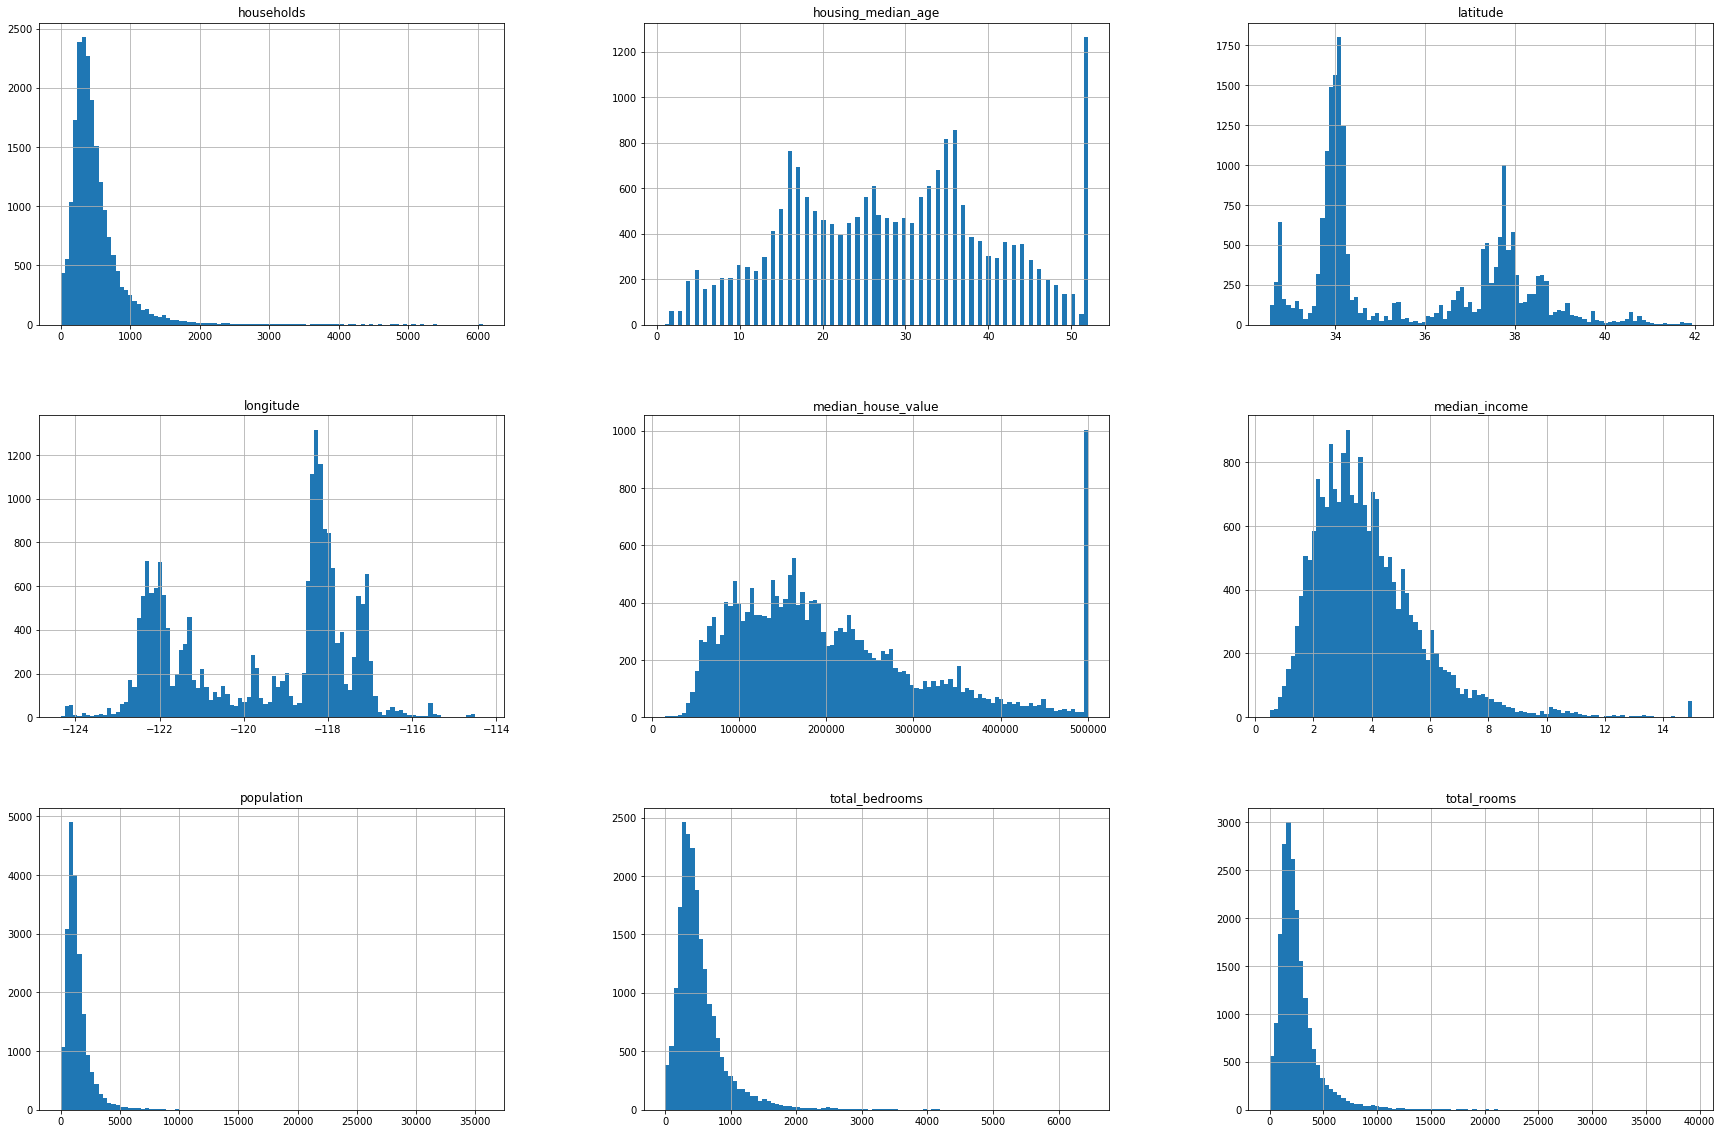

In [9]:
realestate.hist(bins = 100, figsize = (30,20))
plt.show()

### Finding out the distribution of the population by latitude and longitude

Text(0.5, 1.0, 'Distribution of households')

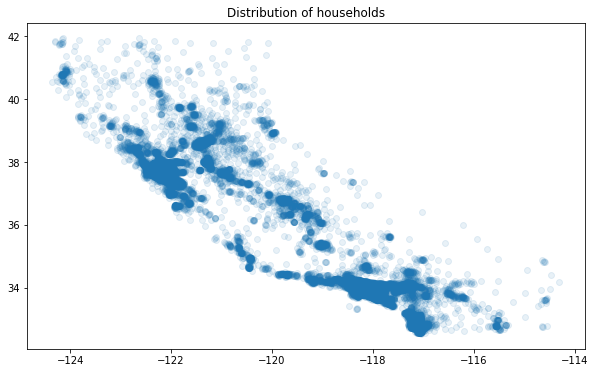

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x=realestate['longitude'],y=realestate['latitude'],alpha = 0.1)
plt.title("Distribution of households")

### Plotting the population against the latitude and longitude to know the population density

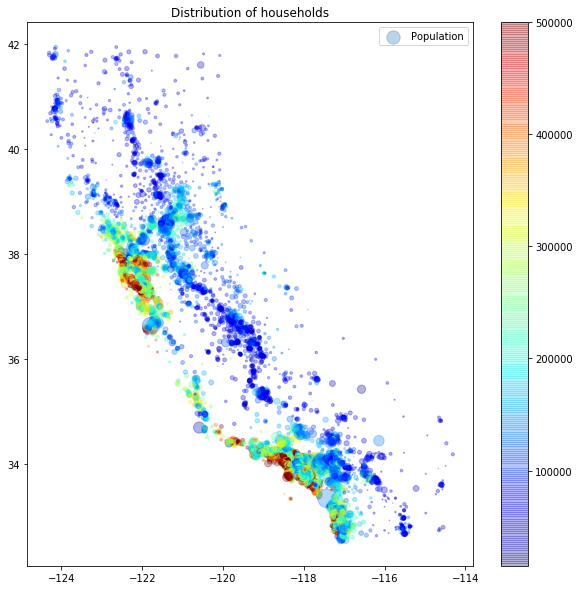

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x=realestate['longitude'],y=realestate['latitude'],alpha=0.3,s=realestate['population']/100,c=realestate['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households")
plt.legend()

### Finding the corelation between the columns

In [12]:
corr_matrix=realestate.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [13]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

In [ ]:
# The median_income has the most positive corelation and 
#latiude has the most non-negative corelation between 
#them

### Plotting the plots between the 4 main columns

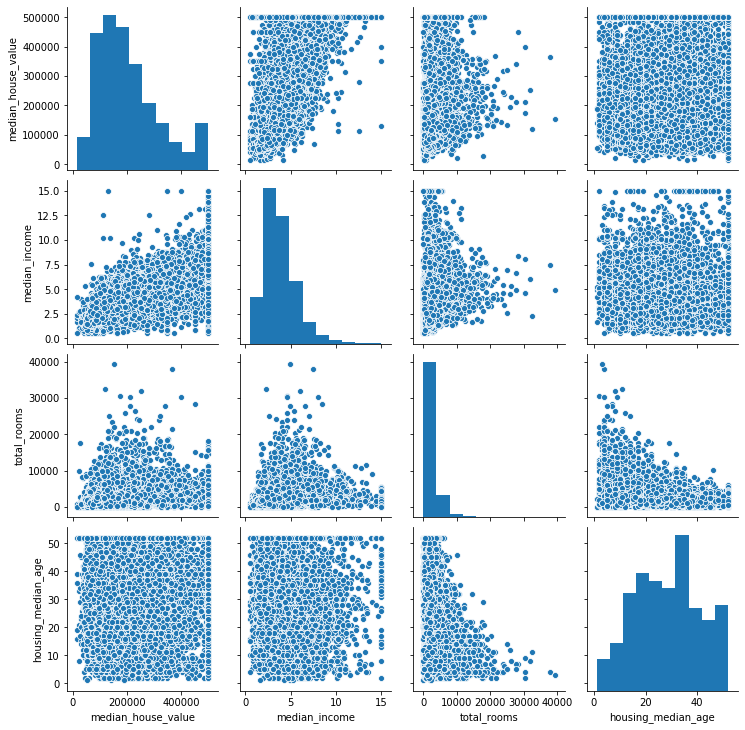

In [14]:
sns.pairplot(realestate[['median_house_value','median_income','total_rooms','housing_median_age']])

### Feature Engineering (Creating new data from the existing data)

In [15]:
data1=realestate.copy()

In [58]:
data1['rooms_per_household']=data1['total_rooms']/data1['households']
data1['bedrooms_per_room']=data1['total_bedrooms']/data1['total_rooms']
data1['population_per_household']=data1['population']/data1['households']
data1['bedrooms_per_room']=data1['total_bedrooms']/data1['total_rooms']
data1["bedroom_per_household"]= data1["total_bedrooms"]/data1["households"]
data1["income_per_housevalue"] = data1["median_income"]/data1["median_house_value"]
data1["income_per_population"] = data1["median_income"]/data1["population"]
data1["population_per_room"] = data1["population"]/data1["total_rooms"]
data1["households_per_population"]= data1["population"]/data1["households"]
data1["houseage_per_income"]= data1["housing_median_age"]/data1["median_income"]
data1["total_bedrooms_per_housevalue"]= data1["median_house_value"]/data1["total_bedrooms"]

In [59]:
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,bedroom_per_household,income_per_housevalue,income_per_population,population_per_room,households_per_population,houseage_per_income,total_bedrooms_per_housevalue
830,-121.99,37.61,9,3666,711.0,2341,703,4.6458,0,217000,5.214794,0.193944,3.330014,1.011380,0.000021,0.001985,0.638571,3.330014,1.937234,305.203938
859,-121.97,37.57,21,4342,783.0,2172,789,4.6146,0,247600,5.503169,0.180332,2.752852,0.992395,0.000019,0.002125,0.500230,2.752852,4.550774,316.219668
860,-121.96,37.58,15,3575,597.0,1777,559,5.7192,0,283500,6.395349,0.166993,3.178891,1.067979,0.000020,0.003218,0.497063,3.178891,2.622744,474.874372
862,-121.99,37.58,31,2878,478.0,1276,485,6.2073,0,282500,5.934021,0.166088,2.630928,0.985567,0.000022,0.004865,0.443363,2.630928,4.994120,591.004184
863,-122.00,37.58,6,4405,717.0,2071,688,5.8151,0,295600,6.402616,0.162770,3.010174,1.042151,0.000020,0.002808,0.470148,3.010174,1.031797,412.273361


In [60]:
corr_matrix=data1.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,bedroom_per_household,income_per_housevalue,income_per_population,population_per_room,households_per_population,houseage_per_income,total_bedrooms_per_housevalue
longitude,1.000000,-0.923460,0.096156,-0.007000,0.026028,0.102573,0.031713,0.081944,-0.271404,0.128989,-0.104771,0.094149,0.180883,-0.042283,-0.106320,-0.010900,0.202490,0.180883,0.003291,0.035470
latitude,-0.923460,1.000000,-0.163219,-0.000199,-0.035154,-0.134394,-0.057035,-0.199243,0.528788,-0.332512,0.151126,-0.101473,-0.202353,0.133458,0.274823,0.003235,-0.245385,-0.202353,0.026619,-0.056712
housing_median_age,0.096156,-0.163219,1.000000,-0.285770,-0.215952,-0.167709,-0.195856,-0.174143,-0.198790,0.044474,-0.264660,0.173630,0.049571,-0.127133,-0.194872,0.003960,0.203601,0.049571,0.669899,0.047661
total_rooms,-0.007000,-0.000199,-0.285770,1.000000,0.904602,0.816809,0.911655,0.250787,-0.015129,0.169556,0.264876,-0.247493,-0.136091,0.010853,0.002475,-0.339170,-0.278334,-0.136091,-0.324958,-0.250559
total_bedrooms,0.026028,-0.035154,-0.215952,0.904602,1.000000,0.860374,0.981375,-0.032185,-0.046751,0.056823,-0.082690,0.150356,-0.167177,0.120323,-0.114371,-0.395781,-0.081272,-0.167177,-0.144822,-0.281812
population,0.102573,-0.134394,-0.167709,0.816809,0.860374,1.000000,0.888454,0.023560,-0.101416,0.008645,-0.108828,0.076035,0.284983,-0.090978,-0.039307,-0.407763,0.267389,0.284983,-0.117000,-0.271031
households,0.031713,-0.057035,-0.195856,0.911655,0.981375,0.888454,1.000000,0.021365,-0.078676,0.091612,-0.117228,0.098031,-0.145716,-0.046435,-0.112169,-0.395570,-0.048508,-0.145716,-0.161898,-0.276833
median_income,0.081944,-0.199243,-0.174143,0.250787,-0.032185,0.023560,0.021365,1.000000,-0.332915,0.676869,0.574255,-0.674168,-0.014555,-0.276535,0.063716,0.192593,-0.373101,-0.014555,-0.668304,0.094886
ocean_proximity,-0.271404,0.528788,-0.198790,-0.015129,-0.046751,-0.101416,-0.078676,-0.332915,1.000000,-0.600823,0.159237,-0.090163,-0.076833,0.180867,0.523988,-0.002230,-0.162713,-0.076833,0.094953,-0.072402
median_house_value,0.128989,-0.332512,0.044474,0.169556,0.056823,0.008645,0.091612,0.676869,-0.600823,1.000000,0.218917,-0.268199,-0.178018,-0.184716,-0.594475,0.121664,-0.257072,-0.178018,-0.375854,0.188360


In [22]:
# From this we can see that that median income has the highest correlation factor with the median house value and 
# bedrooms_per_room has the most negative correation

In [61]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value               1.000000
median_income                    0.676869
rooms_per_household              0.218917
total_bedrooms_per_housevalue    0.188360
total_rooms                      0.169556
longitude                        0.128989
income_per_population            0.121664
households                       0.091612
total_bedrooms                   0.056823
housing_median_age               0.044474
population                       0.008645
population_per_household        -0.178018
households_per_population       -0.178018
bedroom_per_household           -0.184716
population_per_room             -0.257072
bedrooms_per_room               -0.268199
latitude                        -0.332512
houseage_per_income             -0.375854
income_per_housevalue           -0.594475
ocean_proximity                 -0.600823
Name: median_house_value, dtype: float64

In [ ]:
# From this the median_income and the bedrooms_per_room has the most co-relation between median_house_value.

In [25]:
real = data1.copy()

In [26]:
real.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,6.984127,0.146591,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,6.238137,0.155797,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,8.288136,0.129516,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,5.817352,0.184458,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,6.281853,0.172096,2.181467


### Plotting the two most correlated columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B48053908>]],
      dtype=object)

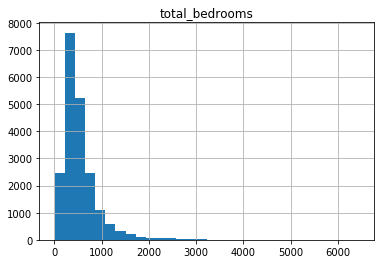

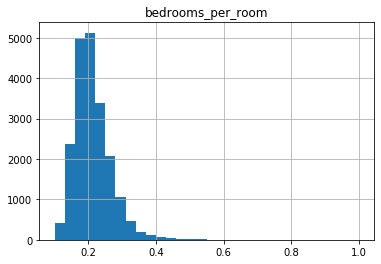

In [27]:
data1.hist(column='total_bedrooms',bins=30)
data1.hist(column='bedrooms_per_room',bins=30)

### Detecting outliers

In [62]:
def outlierdetection(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3 - q1
  low = (q1 - 1.5 * iqr)
  high = (q3 + 1.5 * iqr)
  return x[~((x < (low)) |(x > (high))).any(axis=1)]

In [63]:
# Marking the Outliers
data1 = outlierdetection(data1)

In [64]:
data1.shape

(8409, 20)

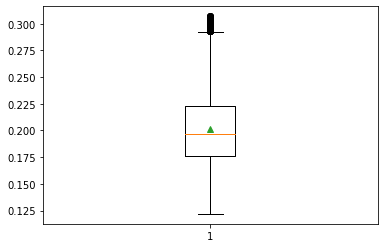

In [65]:
plt.boxplot(data1["bedrooms_per_room"],showmeans=True)
plt.show()

### Label Encoding the Categorical values

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
LE=LabelEncoder()

In [37]:
data1["ocean_proximity"]=LE.fit_transform(data1["ocean_proximity"])

In [38]:
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100,8.288136,0.129516,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300,5.817352,0.184458,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200,6.281853,0.172096,2.181467
5,-122.25,37.85,52,919,213.0,413,193,4.0368,3,269700,4.761658,0.231774,2.139896
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,3,299200,4.931907,0.192899,2.128405


In [39]:
# Assigning columns for Linear Regression()

In [66]:
x=data1.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19]]
y=data1.iloc[:,9]

### Splitting the dataset into the Training set and Test set

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [68]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,bedroom_per_household,income_per_housevalue,income_per_population,population_per_room,households_per_population,houseage_per_income,total_bedrooms_per_housevalue
5938,-117.90,34.14,29,2240,457.0,1187,407,3.8365,0,5.503686,0.204018,2.916462,1.122850,0.000021,0.003232,0.529911,2.916462,7.558973,403.063457
19188,-122.67,38.45,24,2622,525.0,1027,510,2.9222,0,5.141176,0.200229,2.013725,1.029412,0.000012,0.002845,0.391686,2.013725,8.212990,462.095238
12932,-121.23,38.65,19,2926,476.0,1349,480,4.6437,1,6.095833,0.162679,2.810417,0.991667,0.000022,0.003442,0.461039,2.810417,4.091565,447.268908
15551,-117.09,33.11,32,1713,321.0,891,286,3.1429,0,5.989510,0.187391,3.115385,1.122378,0.000018,0.003527,0.520140,3.115385,10.181679,534.579439
7080,-118.00,33.94,36,2911,534.0,1395,486,5.1738,0,5.989712,0.183442,2.870370,1.098765,0.000025,0.003709,0.479217,2.870370,6.958135,381.460674


### Training the Multiple Linear Regression model on the Training set

In [69]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [70]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
y_test

5938     184200
19188    242600
12932    212900
15551    171600
7080     203700
          ...  
2044     153800
15162    182100
11621    320700
11903    150000
11004    227800
Name: median_house_value, Length: 2523, dtype: int64

### Predicting the Test set results

In [73]:
pred=lm.predict(x_test)
pred

array([191687.04525945, 221761.72412256, 212052.64199322, ...,
       261252.73726064, 171344.81981144, 220603.21879756])

### Finding the r2 value to check the Accuracy

In [48]:
from sklearn.metrics import r2_score

In [74]:
r2_score(y_test,pred)

0.940860158832371